In [ ]:
# ..... Seurat integration by stage - 8 samples, SCTransform + CCA ..... #
# _data files have filtered out doublets, cells with <200 genes expressed,
# cells with >200 but <12,000 UMI

In [2]:
library(Seurat)

In [3]:
# list of stages and samples
stages = rep(c('stage14', 'stage17', 'stage21'), each = 3)
samples = paste0('sample', c('4', '7', '8A', '3_Triangle', '5B', '5Y', '1A', '1B', '2'))

In [16]:
id1 = 7
id2 = 8
id3 = 9

# load data
sc1 = readRDS(paste0(stages[id1], '_', samples[id1], '_data.rds'))
sc1$dataset = paste0('s', sub('\\.*sample', '', samples[id1]))

sc2 = readRDS(paste0(stages[id2], '_', samples[id2], '_data.rds'))
sc2$dataset = paste0('s', sub('\\.*sample', '', samples[id2]))

sc3 = readRDS(paste0(stages[id3], '_', samples[id3], '_data.rds'))
sc3$dataset = paste0('s', sub('\\.*sample', '', samples[id3]))

ifnb.list = list(sc1, sc2, sc3)

In [17]:
# for each dataset in the list, apply SCTransform
ifnb.list <- lapply(X = ifnb.list, FUN = SCTransform)
features <- SelectIntegrationFeatures(object.list = ifnb.list, nfeatures = 3000)
ifnb.list <- PrepSCTIntegration(object.list = ifnb.list, anchor.features = features)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 17719 by 7968

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 59 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 17719 genes



  |======================================================================| 100%


Computing corrected count matrix for 17719 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.403785 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 18290 by 8583

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 69 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 18290 genes



  |======================================================================| 100%


Computing corrected count matrix for 18290 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.390446 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 18725 by 8964

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 70 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 18725 genes



  |======================================================================| 100%


Computing corrected count matrix for 18725 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.498895 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



In [18]:
# identify anchors and integrate data
immune.anchors <- FindIntegrationAnchors(object.list = ifnb.list, normalization.method = "SCT",
    anchor.features = features)
immune.combined.sct <- IntegrateData(anchorset = immune.anchors, normalization.method = "SCT")

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 16302 anchors

Filtering anchors

	Retained 12065 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 16229 anchors

Filtering anchors

	Retained 12432 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 15709 anchors

Filtering anchors

	Retained 11876 anchors

Merging dataset 1 into 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 into 3 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [19]:
# run pca, umap
immune.combined.sct <- RunPCA(immune.combined.sct, verbose = FALSE)
immune.combined.sct <- RunUMAP(immune.combined.sct, reduction = "pca", dims = 1:30)

# cluster integrated data
immune.combined.sct <- FindNeighbors(immune.combined.sct, reduction = "pca", dims = 1:30)
immune.combined.sct <- FindClusters(immune.combined.sct, resolution = 0.5)

13:11:05 UMAP embedding parameters a = 0.9922 b = 1.112

13:11:05 Read 25515 rows and found 30 numeric columns

13:11:05 Using Annoy for neighbor search, n_neighbors = 30

13:11:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:11:09 Writing NN index file to temp file /tmp/RtmpZ3jlvZ/fileae7c97a1955b8

13:11:09 Searching Annoy index using 1 thread, search_k = 3000

13:11:16 Annoy recall = 100%

13:11:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:11:17 Initializing from normalized Laplacian + noise (using irlba)

13:11:25 Commencing optimization for 200 epochs, with 1131826 positive edges

13:11:40 Optimization finished



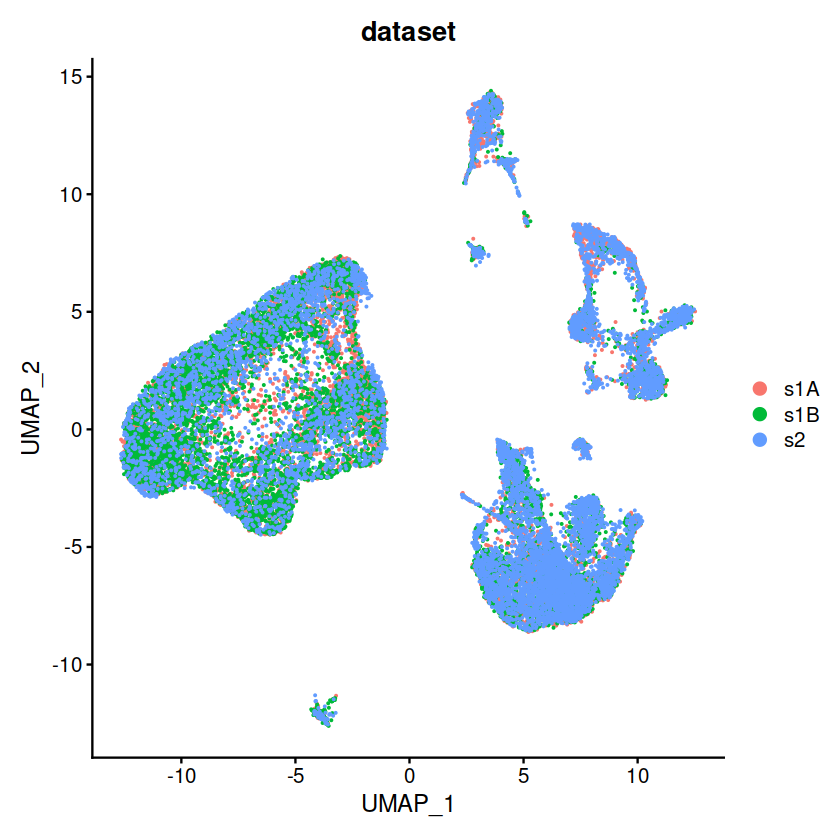

In [20]:
# plot integrated umap
DimPlot(immune.combined.sct, reduction = "umap", group.by = "dataset")

In [21]:
# save
immune.combined.sct
saveRDS(immune.combined.sct, file = 'stage21_integrated_cca.rds')

An object of class Seurat 
49529 features across 25515 samples within 3 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap